# [백준 - Linked List _ DryType](https://www.acmicpc.net/workbook/view/1066)

## [회전하는 큐](https://www.acmicpc.net/problem/1021)

- 문제 

> 지민이는 N개의 원소를 포함하고 있는 양방향 순환 큐를 가지고 있다.   
> 지민이는 이 큐에서 몇 개의 원소를 뽑아내려고 한다.
> 
> 지민이는 이 큐에서 다음과 같은 3가지 연산을 수행할 수 있다.
> 
> 1. 첫 번째 원소를 뽑아낸다. 이 연산을 수행하면, 원래 큐의 원소가 a1, ..., ak이었던 것이 a2, ..., ak와 같이 된다.
> 2. 왼쪽으로 한 칸 이동시킨다. 이 연산을 수행하면, a1, ..., ak가 a2, ..., ak, a1이 된다.
> 3. 오른쪽으로 한 칸 이동시킨다. 이 연산을 수행하면, a1, ..., ak가 ak, a1, ..., ak-1이 된다.
> 큐에 처음에 포함되어 있던 수 N이 주어진다.
> 
> 그리고 지민이가 뽑아내려고 하는 원소의 위치가 주어진다. (이 위치는 가장 처음 큐에서의 위치이다.)  
> 이때, 그 원소를 주어진 순서대로 뽑아내는데 드는 2번, 3번 연산의 최솟값을 출력하는 프로그램을 작성하시오.

- 입력

> 첫째 줄에 큐의 크기 N과 뽑아내려고 하는 수의 개수 M이 주어진다.  
> N은 50보다 작거나 같은 자연수이고, M은 N보다 작거나 같은 자연수이다.  
> 둘째 줄에는 지민이가 뽑아내려고 하는 수의 위치가 순서대로 주어진다.  
> 위치는 1보다 크거나 같고, N보다 작거나 같은 자연수이다.

### 풀이

In [4]:
# deque 함수 사용을 위해 collections 모듈 호출
from collections import deque

# 첫째 줄에 큐의 크기 N과 뽑아내려고 하는 수의 개수 M 입력
n , m = map(int, input().split())

# 큐 생성 (양방향 접근의 편의성을 위해 deque 사용)
queue = deque([i for i in range(1, n+1)])

# 뽑아내려고 하는 수의 위치가 순서대로 주어짐
arr = list(map(int, input().split()))

# 결과값 : 회전시킨 숫자를 cnt로 하여 카운트 예정
cnt = 0

for i in arr:
    while True:
        if queue[0] == i:           # 맨 처음의 원소가 우리가 찾는 원소라면
            queue.popleft()          # 해당 값을 추출
            break
        else:                                         # 맨 처음의 원소가 우리가 찾는 원소가 아니라면
            if queue.index(i) <= len(queue) // 2:     # 우리가 찾는 원소의 위치가 리스트 중앙 기준 좌측인지 확인
                queue.rotate(-1)                       # 맞다면, 좌측으로 한칸 회전시킴
                cnt += 1                               # 회전시킨 횟수를 1만큼 늘려줌.
            else:                                     # 찾는 원소의 위치가, 리스트 중앙 기준 우측인지 확인
                queue.rotate(1)                        # 맞다면, 우측으로 한칸 회전시킴
                cnt += 1                               # 회전시킨 횟수를 1만큼 늘려줌.
print(cnt)

# 참고 : https://yuna0125.tistory.com/m/12

10 3
2 3 5
2


### 학습 내용

[deque - 언제, 왜 사용해야 하는가?](https://leonkong.cc/posts/python-deque.html)

- <span style = "color:blue">collections 모듈의 deque 함수</span>  
>    **```deque : 앞, 뒤 양쪽 방향에서 원소를 추가하거나 제거 가능```**
>    - 양 끝 엘리먼트의 append와 pop이 압도적으로 빠르다.
>    - 컨테이너(container)의 양끝 엘리먼트(element)에 접근하여 삽입 또는 제거를 할 경우,  
        일반적인 리스트(list)가 이러한 연산에 O(n)이 소요되는 데 반해, 데크(deque)는 O(1)로 접근 가능하다.
- <span style = "color:blue">데크(deque) 함수의 메서드(method)</span>  
>    **```deque.append(item)```** : item을 데크의 오른쪽 끝에 삽입한다.  
>    **```deque.appendleft(item)```** : item을 데크의 왼쪽 끝에 삽입한다.  
>    **```deque.pop()```** : 데크의 오른쪽 끝 엘리먼트를 가져오는 동시에 데크에서 삭제한다.  
>    **```deque.popleft()```** : 데크의 왼쪽 끝 엘리먼트를 가져오는 동시에 데크에서 삭제한다.  
>    **```deque.extend(array)```** : 주어진 배열(array)을 순환하면서 데크의 오른쪽에 추가한다.  
>    **```deque.extendleft(array)```** : 주어진 배열(array)을 순환하면서 데크의 왼쪽에 추가한다.  
>    **```deque.remove(item)```** : item을 데크에서 찾아 삭제한다.  
>    **```deque.rotate(num)```** : 데크를 num만큼 회전한다(양수면 오른쪽, 음수면 왼쪽).  
- <span style = "color:blue">데크(deque), 언제 왜 써야 하는가?(method)</span>  
>    - 요약하자면, 데크(deque)는 스택처럼 사용할 수도 있고, 큐 처럼 사용할 수도 있다.
>    - <u>시작점의 값을 넣고 빼거나, 끝 점의 값을 넣고 빼는 데 최적화된 연산 속도를 제공</u>한다.
>    - 즉, 대부분의 경우에 데크(deque)는 리스트(list)보다 월등한 옵션이다.
>    - 데크는 특히 push/pop 연산이 빈번한 알고리즘에서 리스트보다 월등한 속도를 자랑한다.

## [요세푸스 문제](https://www.acmicpc.net/problem/1158)

- 문제 

>요세푸스 문제는 다음과 같다.
> - 1번부터 N번까지 N명의 사람이 원을 이루면서 앉아있고, 양의 정수 K(≤ N)가 주어진다.  
> - 이제 순서대로 K번째 사람을 제거한다.  
> - 한 사람이 제거되면 남은 사람들로 이루어진 원을 따라 이 과정을 계속해 나간다.  
> - 이 과정은 N명의 사람이 모두 제거될 때까지 계속된다.  
> - 원에서 사람들이 제거되는 순서를 (N, K)-요세푸스 순열이라고 한다.  
> - 예를 들어 (7, 3)-요세푸스 순열은 <3, 6, 2, 7, 5, 1, 4>이다.

- 입력
> N과 K가 주어지면 (N, K)-요세푸스 순열을 구하는 프로그램을 작성하시오.

### 풀이

In [ ]:
# 첫째 줄에 총 인원수 N과 주기로 제거할 K번째 값을 입력
N,K = map(int,input().split())

# 처음에 원의 형태로 앉아있는 사람들 : list 생성
arr = list(range(1,N+1))

# 제거될 사람의 인덱스 번호
num = 0  

# 결과값 : 제거된 사람들을 넣을 배열
answer = []   


for t in range(N):
    num += K-1                # K가 아닌 K-1인 이유? 아래에 pop을 할 때, num 값이 index로 들어가기 때문!
                               # num = (K-1)이라면, index 값이 (K-1)인 셈이고 그렇다면 pop을 할 때 리스트에서 K번째 원소를 추출함.
    if num >= len(arr):       # 한 바퀴를 돌고 그 다음으로 돌아올 때를 대비해 값을 나머지로 바꿈  
        num = num%len(arr)
        
    answer.append(str(arr.pop(num)))          # K번째 값에 대해 answer 리스트에 추가

# 문제에서 요구한 형태로 출력          ->     참고 : https://tturbo0824.tistory.com/18
print("<",", ".join(answer),">", sep='')

# 참고 : https://infinitt.tistory.com/213

In [ ]:
# deque 함수 사용을 위해 collections 모듈 호출
from collections import deque

# 첫째 줄에 총 인원수 N과 주기로 제거할 K번째 값을 입력
n, k = map(int, input().split())

# 처음에 원의 형태로 앉아있는 사람들 : 큐 생성 (양방향 접근의 편의성을 위해 deque 사용)
queue = deque(range(1,n+1))

# 결과값 : 순서대로 추출한 값을 answer라는 list에 담아서 출력 예정
answer = []


while queue:                             # 4.아래 작업들을 반복하였을 때, queue 리스트가 처음 모양과 동일한 형태가 되면 종료. 
    for i in range(k-1):                 # 1. 우리는 k번째 값을 뽑을 예정이기에, 1~(k-1)번째 값에 대한 처리를 할 것이다
        queue.append(queue.popleft())     # 2. 좌측부터 1~(k-1)번째 값에 대해 queue 리스트에서 제거 후 다시 리스트 우측 끝에 추가
    answer.append(queue.popleft())        # 3. k번째 값에 대해서는 answer 리스트에 추가
                                            # → 즉,queue 리스트의 원소가 한 번 씩 answer에 다 담기고, 
                                            #       queue 리스트가 처음과 동일한 형태로 돌아가면 해당 while 문이 종료된다는 뜻임.
            
# 문제에서 요구한 형태로 출력          ->     참고 : https://tturbo0824.tistory.com/18
print("<", ', '.join(str(i) for i in answer), ">", sep = '')


# 참고: https://hongcoding.tistory.com/41

## [풍선 터뜨리기](https://www.acmicpc.net/problem/2346)

- 문제 

> 1번부터 N번까지 N개의 풍선이 원형으로 놓여 있고. i번 풍선의 오른쪽에는 i+1번 풍선이 있고, 왼쪽에는 i-1번 풍선이 있다.  
> 단, 1번 풍선의 왼쪽에 N번 풍선이 있고, N번 풍선의 오른쪽에 1번 풍선이 있다.  
> 각 풍선 안에는 종이가 하나 들어있고, 종이에는 -N보다 크거나 같고, N보다 작거나 같은 정수가 하나 적혀있다.  
> 이 풍선들을 다음과 같은 규칙으로 터뜨린다.
> 
> 우선, 제일 처음에는 1번 풍선을 터뜨린다.  
> 다음에는 풍선 안에 있는 종이를 꺼내어 그 종이에 적혀있는 값만큼 이동하여 다음 풍선을 터뜨린다.  
> 양수가 적혀 있을 경우에는 오른쪽으로, 음수가 적혀 있을 때는 왼쪽으로 이동한다. 이동할 때에는 이미 터진 풍선은 빼고 이동한다.
> 
> 예를 들어 다섯 개의 풍선 안에 차례로 3, 2, 1, -3, -1이 적혀 있었다고 하자.  
> 이 경우 3이 적혀 있는 1번 풍선, -3이 적혀 있는 4번 풍선, -1이 적혀 있는 5번 풍선,  
> 1이 적혀 있는 3번 풍선, 2가 적혀 있는 2번 풍선의 순서대로 터지게 된다.

- 입력

> 첫째 줄에 자연수 N(1 ≤ N ≤ 1,000)이 주어진다.  
> 다음 줄에는 차례로 각 풍선 안의 종이에 적혀 있는 수가 주어진다.  
>종이에 0은 적혀있지 않다.

### 풀이

In [ ]:
# 총 풍선의 개수 입력받기
N = int(input())

# 풍선 안에 적혀있는 숫자들을 순서대로 입력받기
list_N = list(map(int, input().split()))

# 풍선의 순서를 리스트로 지정
list_index = list(range(1,N+1))

# 결과값 : 터지는 풍선의 순서를 해당 리스트에 추가하여 출력 예정
result = []

# 첫 번째 풍선을 터뜨렸을 때
idx = 0                              # 첫 번째 풍선의 index : idx
k = list_N.pop(idx)                  # k : 첫 번째 풍선 내의 숫자 -> list_N에서 추출
result.append(list_index.pop(idx))   # result 리스트에 첫 번째 풍선의 순서를 추가


while(len(list_N) > 0):                  # 풍선을 다 터뜨려서 남아있지 않으면 그만하겠다
    
    # 풍선 속 숫자가 음수이면 인덱스에 풍선 속 숫자를 더한 후 리스트의 길이로 나누면 다음 인덱스가 나온다.
    if(k < 0):
        idx = (idx+k) % len(list_N)
    # 풍선 속 숫자가 양수이면 인덱스에 풍선 속 숫자에서 1을 뺀 것을 더한 후 리스트의 길이로 나누면 다음 인덱스가 나온다.
    # (-1)의 의미는 리스트 슬라이싱 시 음수가 들어가는 경우를 생각해보면 됨.
    else:
        idx = (idx+(k-1))%len(list_N)
        
    k = list_N.pop(idx)
    result.append(list_index.pop(idx))
        
        
for j in range(N):
    print(result[j], end=" ")
    
# 참고 : https://carrido-hobbies-well-being.tistory.com/120

In [ ]:
# deque 함수 사용을 위해 collections 모듈 호출
from collections import deque

# 문자열 입력을 받기 위한 모듈 및 함수   -> 참고 : https://velog.io/@yeseolee/Python-파이썬-입력-정리sys.stdin.readline
import sys
input = sys.stdin.readline

# 총 풍선의 개수 입력받기
n = int(input())

# 풍선 안에 적혀있는 숫자들을 순서대로 입력받아서 
# enumerate 함수를 이용하여 (index, value) 쌍의 tuple 형태로 객체를 반환 후 deque로 만들기
arr = deque(enumerate(map(int,input().split()),1))

# 결과값 : 터지는 풍선의 순서를 해당 리스트에 추가하여 출력 예정
ans = []

# index No.를 이용하여 풍선의 터지는 순서를 입력 예정
idx = 0

while arr:
    if idx > 0:                        # idx가 양수라면, 0이 될 때까지 작업을 반복
        a,b = arr.popleft()             # 제일 왼쪽의 원소를 추출
        arr.append((a,b))               # 추출한 원소를 다시 풍선 deque의 맨 오른쪽에 삽입
        idx -=1                         # idx 값을 하나 줄이기
    elif idx < 0:                      # idx가 음수라면, 0이 될 때까지 작업을 반복
        a,b = arr.pop()                 # 제일 오른쪽의 원소를 추출
        arr.appendleft((a,b))           # 추출한 원소를 다시 풍선 deque의 맨 왼쪽에 삽입
        idx +=1                         # idx 값을 하나 늘리기
    else:                              # idx가 0이라면,
        a,b = arr.popleft()             # 제일 왼쪽의 원소를 추출
        ans.append(a)                   # 추출한 원소의 idx 값만 ans list에 삽입
        if b > 0:                       # value값(= 이동방향 & 이동길이 포함)이 양수라면
            idx = b-1                   # idx 값은 value에서 하나 뺀 값으로 지정(list의 슬라이싱 생각해보면 답나옴)
        else:                           # value값(= 이동방향 & 이동길이 포함)이 음수라면
            idx = b                      # idx 값은 value 값으로 지정(list의 슬라이싱 생각해보면 답나옴)
            
print(*ans)

# 참고 : https://my-coding-notes.tistory.com/527

### 학습 내용

[enumerate 함수](https://jimmy-ai.tistory.com/103)

> - 이 함수는 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴합니다.
> - 보통 enumerate 함수는 for문과 함께 자주 사용됩니다.
>
> - 참고 : https://wikidocs.net/20792
> - 참고 : https://pearlluck.tistory.com/466

## [행운의 바퀴](https://www.acmicpc.net/problem/2840)

- 문제 

> 상덕이는 최근에 행운의 바퀴를 구매했다. 상덕이는 바퀴의 각 칸에 알파벳 대문자를 아래 그림과 같이 적었다.
>
> 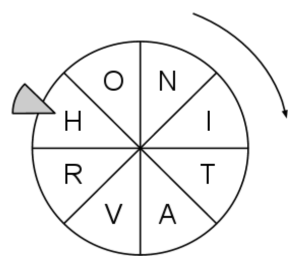
>
> 바퀴에 같은 글자는 두 번 이상 등장하지 않는다. 또, 바퀴는 시계방향으로만 돌아간다.   
바퀴 옆에는 화살표가 있는데, 이 화살표는 항상 한 곳을 가리키고 있으며, 돌아가는 동안 가리키는 글자는 바뀌게 된다.  
위의 그림에서는 H를 가리키고 있다.
>
> 상덕이는 바퀴를 연속해서 K번 돌릴 것이다.  
> 매번 바퀴를 돌릴 때 마다, 상덕이는 화살표가 가리키는 글자가 변하는 횟수와 어떤 글자에서 회전을 멈추었는지를 종이에 적는다.
>
> 희원이는 상덕이가 적어놓은 종이를 발견했다. 그 종이를 바탕으로 상덕이가 바퀴에 적은 알파벳을 알아내려고 한다.  
>
> 상덕이가 종이에 적어놓은 내용과 바퀴의 칸의 수가 주어졌을 때, 바퀴에 적어놓은 알파벳을 알아내는 프로그램을 작성하시오.  

- 입력

> 첫째 줄에 바퀴의 칸의 수 N과 상덕이가 바퀴를 돌리는 횟수 K가 주어진다. (2 ≤ N ≤ 25, 1 ≤ K ≤ 100)
> 다음 줄부터 K줄에는 바퀴를 회전시켰을 때 화살표가 가리키는 글자가 몇 번 바뀌었는지를 나타내는 S와 회전을 멈추었을 때
> 가리키던 글자가 주어진다. (1 ≤ S ≤ 100)

### 풀이

In [ ]:



# 참고 : https://derekahndev.github.io/problem%20solving/boj-2840/

## [에디터](https://www.acmicpc.net/problem/1406)

- 문제 

> 한 줄로 된 간단한 에디터를 구현하려고 한다. 이 편집기는 영어 소문자만을 기록할 수 있는 편집기로, 최대 600,000글자까지 입력할 수 있다.  
> 이 편집기에는 '커서'라는 것이 있는데,  
> 커서는 문장의 맨 앞(첫 번째 문자의 왼쪽), 문장의 맨 뒤(마지막 문자의 오른쪽),  
> 또는 문장 중간 임의의 곳(모든 연속된 두 문자 사이)에 위치할 수 있다.  
> 즉 길이가 L인 문자열이 현재 편집기에 입력되어 있으면, 커서가 위치할 수 있는 곳은 L+1가지 경우가 있다.
>
> 이 편집기가 지원하는 명령어는 다음과 같다.
>> - **L** : 커서를 왼쪽으로 한 칸 옮김 (커서가 문장의 맨 앞이면 무시됨)  
>> - **D** : 커서를 오른쪽으로 한 칸 옮김 (커서가 문장의 맨 뒤이면 무시됨)  
>> - **B** : 커서 왼쪽에 있는 문자를 삭제함 (커서가 문장의 맨 앞이면 무시됨).
>>    - 삭제로 인해 커서는 한 칸 왼쪽으로 이동한 것처럼 나타나지만, 실제로 커서의 오른쪽에 있던 문자는 그대로임.   
>> - **P ＄** : ＄라는 문자를 커서 왼쪽에 추가함
>
> 초기에 편집기에 입력되어 있는 문자열이 주어지고, 그 이후 입력한 명령어가 차례로 주어졌을 때,  
> 모든 명령어를 수행하고 난 후 편집기에 입력되어 있는 문자열을 구하는 프로그램을 작성하시오.  
> 단, 명령어가 수행되기 전에 커서는 문장의 맨 뒤에 위치하고 있다고 한다.

- 입력

> 첫째 줄에는 초기에 편집기에 입력되어 있는 문자열이 주어진다.  
> 이 문자열은 길이가 N이고, 영어 소문자로만 이루어져 있으며, 길이는 100,000을 넘지 않는다.  
> 둘째 줄에는 입력할 명령어의 개수를 나타내는 정수 M(1 ≤ M ≤ 500,000)이 주어진다.  
> 셋째 줄부터 M개의 줄에 걸쳐 입력할 명령어가 순서대로 주어진다.  
> 명령어는 위의 네 가지 중 하나의 형태로만 주어진다.

### 풀이

In [ ]:
import sys                                          # sys.stdin.readline()을 쓰기 위해서 import sys.
  
stack_l = list(input())                              # 스택 왼쪽을 표현한 stack_l 변수에 문자 입력 받음
stack_r = []                                         # 스택 오른쪽을 표현한 stack_r 변수에 스택을 쌓기 위해 빈 리스트 초기화.
n = int(input())                                     # n변수에 edit 입력 횟수 입력 받음.

for i in range(n):                                  # for문을 edit 입력 횟수에 따라 반복시키고 그 안에서 edit 입력 받음.
    command = sys.stdin.readline().split()

    if command[0] == "L" and stack_l:               # command[0]가 L과 같고 stack_l이 True(값이 있으면)면,
        stack_r.append(stack_l.pop())                # stack_l의 마지막 값을 pop해서 stack_r 마지막자리에 append해서 넣는다.
    elif command[0] == "D" and stack_r:             # command[0]가 D과 같고 stack_r이 True(값이 있으면)면,
        stack_l.append(stack_r.pop())                # stack_r의 마지막 값을 pop해서 stack_l 마지막자리에 append해서 넣는다
    elif command[0] == "B" and stack_l:             # for문 안에서 입력받은 command[0]가 B와 같고 stack_l이 True(값이 있으면)면,
        stack_l.pop()                                # stack_l의 마지막 값을 pop한다.
    elif command[0] == "P":                         # for문 안에서 입력받은 command[0]가 P와 같으면,
        stack_l.append(command[1])                   # stack_l의 마지막 값에 입력받은 command[1]을 append 한다.
        
# stack_l와 stack_r을 합쳐야 한다
print("".join(stack_l + list(reversed(stack_r))))    # stark_r을 뒤집어야 원하는 원래 문자열 배열 순서로 돌아옴

# 참고 : https://velog.io/@tkdduf727/백준-괄호-1406번-파이썬-Python-자료구조

### 학습 내용

[input()대신 sys.stdin.readline()을 사용하는 이유](https://velog.io/@yeseolee/Python-파이썬-입력-정리sys.stdin.readline)

1.  <span style = "color:red"><u>반복문으로 여러줄 입력받는 상황</u>에서는 반드시 sys.stdin.readline()을 사용해야 시간초과가 발생하지 않습니다.</span>  

    - <span style = "color:blue">한 개의 정수를 입력받을 때</span>  
> ```python
> import sys
> a = int(sys.stdin.readline())
> ```

    - <span style = "color:blue">정해진 개수의 정수를 한줄에 입력받을 때</span>  
> ```python
> import sys
> a,b,c = map(int,sys.stdin.readline().split())
> ```

    - <span style = "color:blue">임의의 개수의 정수를 한줄에 입력받아 리스트에 저장할 때</span>  
> ```python
> import sys
> data = list(map(int,sys.stdin.readline().split()))
> ```

    - <span style = "color:blue">임의의 개수의 정수를 n줄 입력받아 2차원 리스트에 저장할 때</span>  
> ```python
> import sys
> data = []
> n = int(sys.stdin.readline())
> for i in range(n):
>    data.append(list(map(int,sys.stdin.readline().split())))
> ```

    - <span style = "color:blue">문자열 n줄을 입력받아 리스트에 저장할 때</span>  
> ```python
> import sys
> n = int(sys.stdin.readline())
> data = [sys.stdin.readline().strip() for i in range(n)]
> ```


## [키로거](https://www.acmicpc.net/problem/5397)

- 문제 

> 창영이는 강산이의 비밀번호를 훔치기 위해서 강산이가 사용하는 컴퓨터에 키로거를 설치했다. 
> 며칠을 기다린 끝에 창영이는 강산이가 비밀번호 창에 입력하는 글자를 얻어냈다.  
> 
> 키로거는 사용자가 키보드를 누른 명령을 모두 기록한다.  
> 따라서, 강산이가 비밀번호를 입력할 때, 화살표나 백스페이스를 입력해도 정확한 비밀번호를 알아낼 수 있다.  
> 
> 강산이가 비밀번호 창에서 입력한 키가 주어졌을 때, 강산이의 비밀번호를 알아내는 프로그램을 작성하시오.  
> 강산이는 키보드로 입력한 키는 알파벳 대문자, 소문자, 숫자, 백스페이스, 화살표이다.

- 입력

> 첫째 줄에 테스트 케이스의 개수가 주어진다.  
> 각 테스트 케이스는 한줄로 이루어져 있고, 강산이가 입력한 순서대로 길이가 L인 문자열이 주어진다. (1 ≤ L ≤ 1,000,000)  
> 강산이가 백스페이스를 입력했다면, '-'가 주어진다.  
> 이때 커서의 바로 앞에 글자가 존재한다면, 그 글자를 지운다.  
> 화살표의 입력은 '<'와 '>'로 주어진다. 이때는 커서의 위치를 움직일 수 있다면, 왼쪽 또는 오른쪽으로 1만큼 움직인다.  
> 나머지 문자는 비밀번호의 일부이다. 물론, 나중에 백스페이스를 통해서 지울 수는 있다.  
> 만약 커서의 위치가 줄의 마지막이 아니라면, 커서 및 커서 오른쪽에 있는 모든 문자는 오른쪽으로 한 칸 이동한다.

### 풀이

## [뱀](https://www.acmicpc.net/problem/3190)

- 문제 

> 'Dummy' 라는 도스게임이 있다. 이 게임에는 뱀이 나와서 기어다니는데, 사과를 먹으면 뱀 길이가 늘어난다.  
> 뱀이 이리저리 기어다니다가 벽 또는 자기자신의 몸과 부딪히면 게임이 끝난다.
> 
> 게임은 NxN 정사각 보드위에서 진행되고, 몇몇 칸에는 사과가 놓여져 있다.  
> 보드의 상하좌우 끝에 벽이 있다.  
> 게임이 시작할때 뱀은 맨위 맨좌측에 위치하고 뱀의 길이는 1 이다. 뱀은 처음에 오른쪽을 향한다.
> 
> 뱀은 매 초마다 이동을 하는데 다음과 같은 규칙을 따른다.
> 
> - 먼저 뱀은 몸길이를 늘려 머리를 다음칸에 위치시킨다.  
> - 만약 이동한 칸에 사과가 있다면, 그 칸에 있던 사과가 없어지고 꼬리는 움직이지 않는다.  
> - 만약 이동한 칸에 사과가 없다면, 몸길이를 줄여서 꼬리가 위치한 칸을 비워준다. 즉, 몸길이는 변하지 않는다.  
> 
> 사과의 위치와 뱀의 이동경로가 주어질 때 이 게임이 몇 초에 끝나는지 계산하라.  

- 입력

> 첫째 줄에 보드의 크기 N이 주어진다. (2 ≤ N ≤ 100) 다음 줄에 사과의 개수 K가 주어진다. (0 ≤ K ≤ 100)
> 
> 다음 K개의 줄에는 사과의 위치가 주어지는데, 첫 번째 정수는 행, 두 번째 정수는 열 위치를 의미한다.  
> 사과의 위치는 모두 다르며, 맨 위 맨 좌측 (1행 1열) 에는 사과가 없다.
> 
> 다음 줄에는 뱀의 방향 변환 횟수 L 이 주어진다. (1 ≤ L ≤ 100)
> 
> 다음 L개의 줄에는 뱀의 방향 변환 정보가 주어지는데,  정수 X와 문자 C로 이루어져 있으며,  
> 게임 시작 시간으로부터 X초가 끝난 뒤에 왼쪽(C가 'L') 또는 오른쪽(C가 'D')로 90도 방향을 회전시킨다는 뜻이다.  
> X는 10,000 이하의 양의 정수이며, 방향 전환 정보는 X가 증가하는 순으로 주어진다.

### 풀이